In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

### A/A test that converges

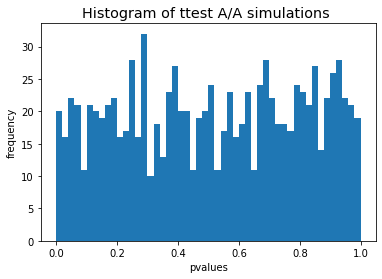

0.051

In [3]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale = 1 / 0.001, size = n),
    "s2": np.random.exponential(scale = 1 / 0.001, size = n)
})

# Running A/A Test Simulations
for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # saving pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Checking that the number of false positive cases does not exceed alpha
sum(np.array(res) < 0.05) / simulations

### The second case where the A/A test does not converge

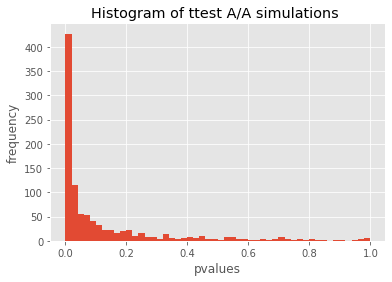

0.577

In [4]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale = 1 / 0.001, size = n),
    "s2": np.random.exponential(scale = 1 / 0.001, size = n) * 1.1 # добавляем эффект 10%
})

for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR won't converge
sum(np.array(res) < 0.05) / simulations

In [5]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/Stat_10/hw_aa.csv', sep = ';')
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


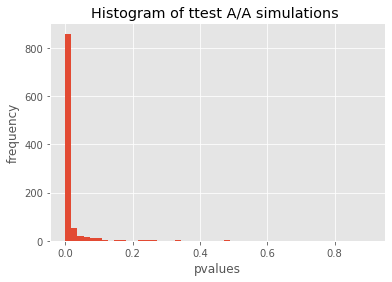

0.927

In [7]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Running A/A Test Simulations
for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # saving p-value

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Checking that the number of false positive cases does not exceed alpha
sum(np.array(res) < 0.05) / simulations

FPR did not converge, let's try to understand why

In [8]:
df.groupby(['experimentVariant', 'version'], as_index = False).agg({'purchase' : 'mean', 'Unnamed: 0' : 'count'})

,experimentVariant,version,purchase,Unnamed: 0
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


We will use t-test because it was originally used in the A / A test

In [9]:
stats.ttest_ind(
    df.query('experimentVariant == 0 and version != "v2.8.0"').purchase,
    df.query('experimentVariant == 1 and version != "v2.8.0"').purchase
)               

Ttest_indResult(statistic=-0.024027679164509035, pvalue=0.9808306388094195)

In [10]:
stats.ttest_ind(
    df.query('experimentVariant == 0 and version != "v2.9.0"').purchase,
    df.query('experimentVariant == 1 and version != "v2.9.0"').purchase
) 

Ttest_indResult(statistic=-34.54098817253235, pvalue=6.0232305184095556e-260)

In [11]:
stats.ttest_ind(
    df.query('experimentVariant == 0 and version != "v3.7.4.0"').purchase,
    df.query('experimentVariant == 1 and version != "v3.7.4.0"').purchase
) 

Ttest_indResult(statistic=-28.508336145216287, pvalue=3.7055746801446784e-178)

In [12]:
stats.ttest_ind(
    df.query('experimentVariant == 0 and version != "v3.8.0.0"').purchase,
    df.query('experimentVariant == 1 and version != "v3.8.0.0"').purchase
) 

Ttest_indResult(statistic=-28.728564989994197, pvalue=7.333210030122562e-181)

Let's A/A test without a v2.8.0

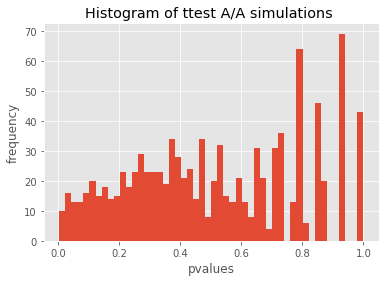

0.029

In [14]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Running A/A Test Simulations
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant == 1) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant == 0) & (df.version != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # saving p-value

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Checking that the number of false positive cases does not exceed alpha
sum(np.array(res) < 0.05) / simulations

# Conclusion

### Reasons why the test does not converge:

- Different number of users in group 1 and group 0 for all versions of the application, not very critical differences, but still they are

- Special oddities with version v2.8.0 that we got from p-value > 0.05

### What should be done?

- Most likely, the data from the application version v2.8.0 was collected incorrectly. It is worth reviewing the code and collecting data in a new way

- It is worth looking at individual phone models, because. perhaps this is the reason, but at the moment we do not own such data in our df